In [4]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,mean_squared_error, mean_absolute_error, median_absolute_error



import warnings 
warnings.filterwarnings('ignore')



In [5]:
dataset = pd.read_csv('student_data.csv')

In [6]:
dataset

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [7]:
dataset.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [8]:
dataset.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [9]:
#pandas_profiling.ProfileReport(dataset).to_file('student_dataset_mat.html')

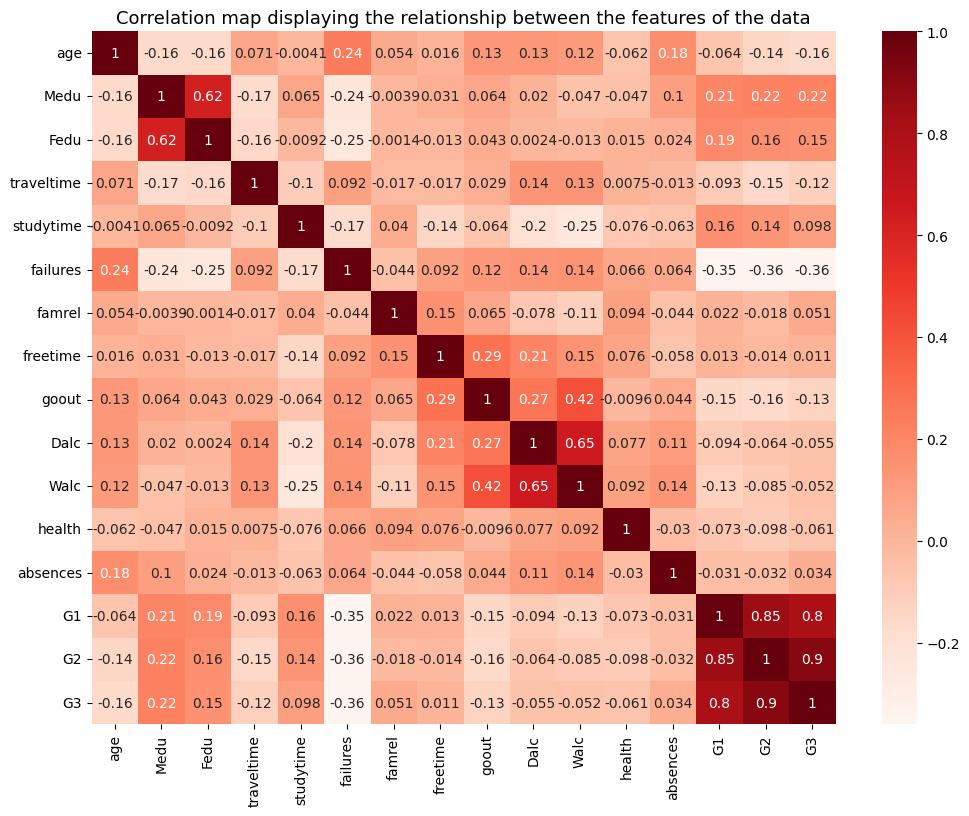

In [10]:
plt.figure(figsize=(12,9))
sns.heatmap(dataset.corr(), cmap=plt.cm.Reds, annot=True)
plt.title('Correlation map displaying the relationship between the features of the data',
         fontsize=13)
plt.show()

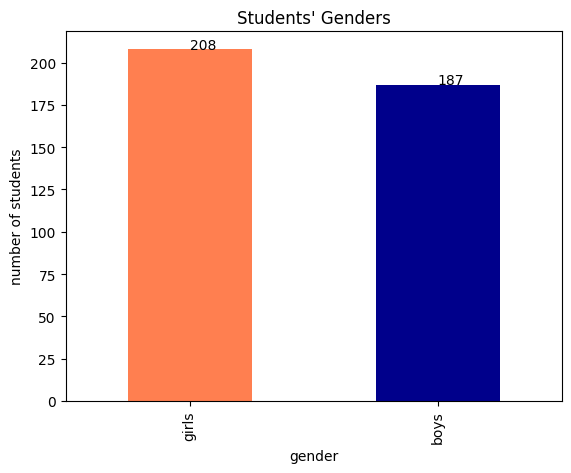

In [11]:
df = pd.DataFrame({'gender':['girls','boys'], 'number':dataset['sex'].value_counts()})
df.plot(kind='bar', x='gender', y='number', color = [ 'coral', 'darkblue'])
for index, value in enumerate(list(df['number'])):
    plt.text(index, value, str(value))
    plt.title("Students' Genders")
    plt.ylabel('number of students')
    plt.legend().remove()
plt.show()

In [12]:
#Distribution of ages
ages = dataset["age"].value_counts() 
age = (np.array(ages.index)) 
percentage = (np.array((ages/ ages.sum())*100)) 
ages

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

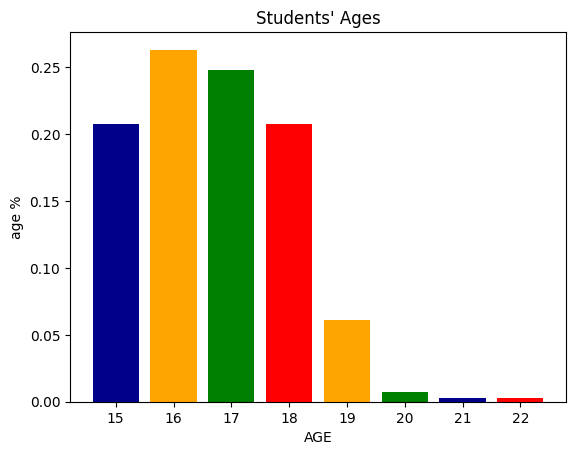

In [13]:
x = age
y = ages / ages.sum() 
x, y
plt.title("Students' Ages")
plt.xlabel('AGE')
plt.ylabel('age %')
plt.bar(x, y, color = ['orange', 'green','red', 'darkblue'])
plt.show()

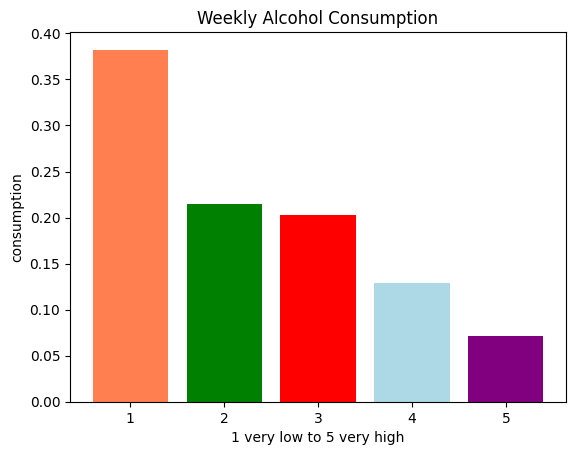

1    151
2     85
3     80
4     51
5     28
Name: Walc, dtype: int64

In [14]:
wa= dataset['Walc'].value_counts()
x = (np.array(wa.index)) 
y = (np.array((wa/ wa.sum()))) 
plt.title('Weekly Alcohol Consumption')
plt.xlabel('1 very low to 5 very high')
plt.ylabel('consumption')
plt.bar(x, y, color = ['coral', 'green','red', 'lightblue' , 'purple'])
plt.show()
wa

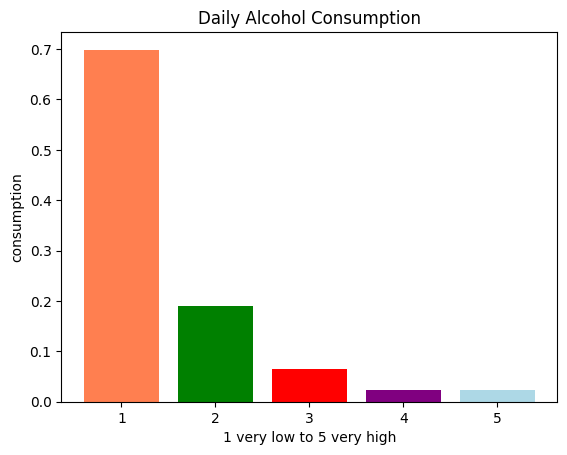

1    276
2     75
3     26
5      9
4      9
Name: Dalc, dtype: int64

In [15]:
da= dataset['Dalc'].value_counts()
x = (np.array(da.index)) 
y = (np.array((da/ da.sum()))) 
plt.title('Daily Alcohol Consumption')
plt.xlabel('1 very low to 5 very high')
plt.ylabel('consumption')
plt.bar(x, y, color = ['coral', 'green','red', 'lightblue' , 'purple'])
plt.show()
da

In [16]:
#how many students consumes alc side by side
frames = [wa, da]
result = pd.merge(wa, da, left_index=True, right_index=True)
result

Walc  Dalc
1   151   276
2    85    75
3    80    26
4    51     9
5    28     9

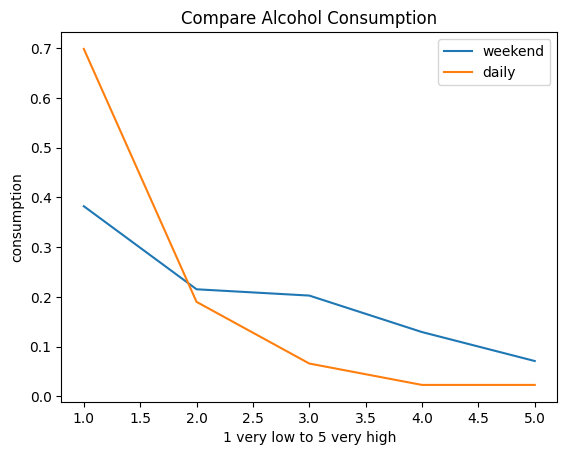

In [17]:
#visual comparison
x = (np.array(result.index)) 
y = (np.array((result)/ result.sum()))
plt.title('Compare Alcohol Consumption')
plt.xlabel('1 very low to 5 very high')
plt.ylabel('consumption')
plt.plot(x, y, label = ['weekend', 'daily'])
plt.legend(loc="upper right")
plt.show()

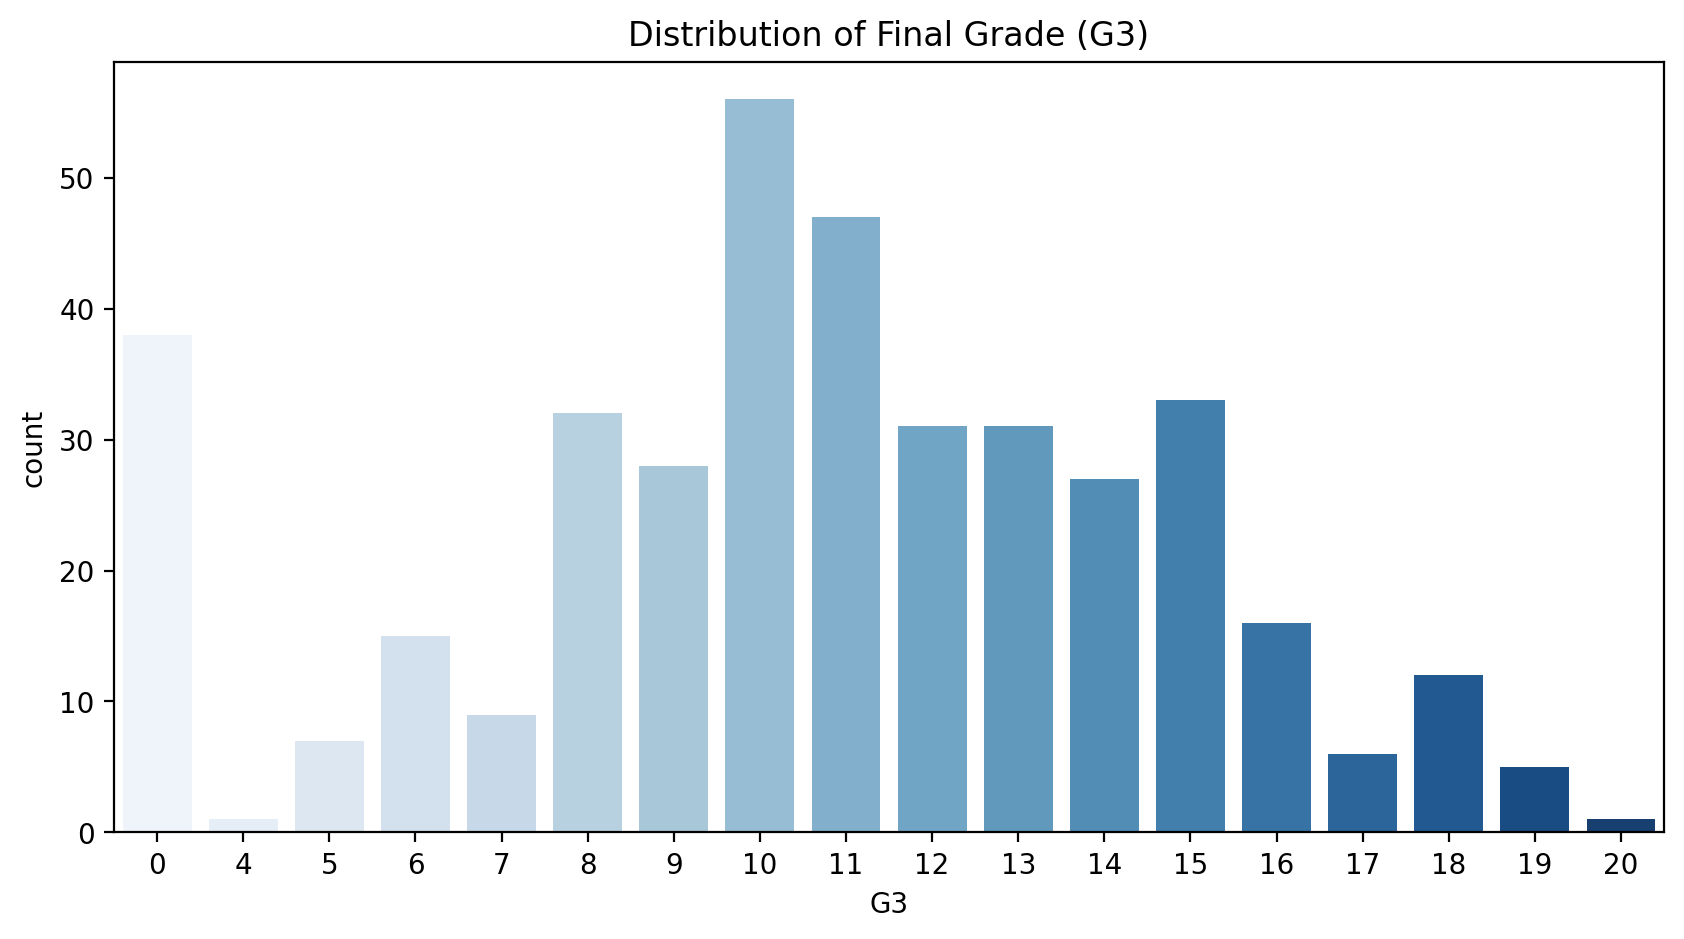

In [18]:
plt.figure(figsize=(10, 5), dpi=200)
sns.countplot(x = dataset['G3'], palette='Blues')
plt.title('Distribution of Final Grade (G3)')
plt.show()


In [19]:
#number of rows with grade 0
len(dataset['G3'][dataset['G3']==0])


38

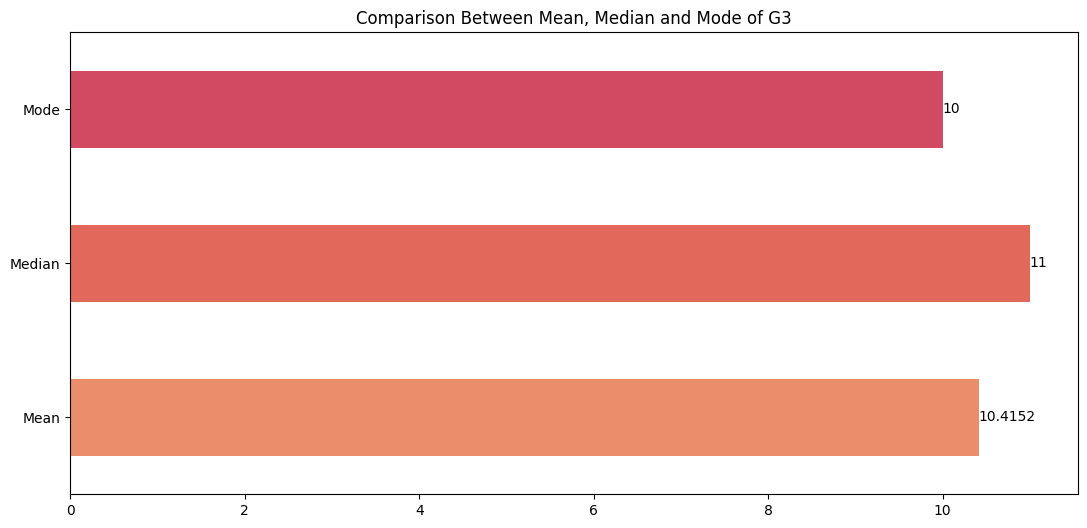

In [20]:
#mean, median and mode of G3
plt.figure(figsize=(13,6))
data=pd.Series({'Mean': dataset.G3.mean(), 'Median': dataset.G3.median(), 'Mode': dataset.G3.mode()[0]}).plot(kind='barh',
         title='Comparison Between Mean, Median and Mode of G3', color=sns.color_palette("flare"))

for container in data.containers:
    data.bar_label(container)  
    
plt.show()

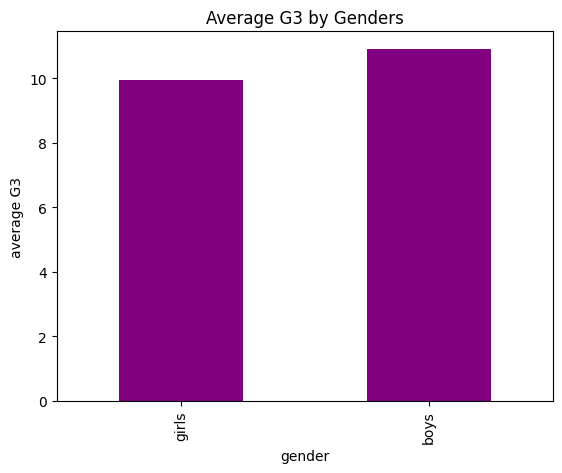

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

In [21]:
#average grade distribution between genders
df = dataset.groupby('sex', as_index=True).G3.mean()
v_df = pd.DataFrame({'gender':['girls','boys'], 'average G3':df})
v_df.plot(kind='bar', x='gender', y='average G3', color = [ 'purple'])
plt.title('Average G3 by Genders')
plt.ylabel('average G3')
plt.legend().remove()
plt.show()
df

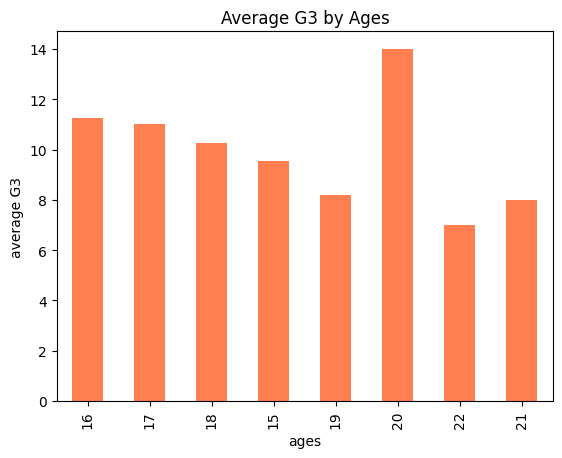

age
15    11.256098
16    11.028846
17    10.275510
18     9.548780
19     8.208333
20    14.000000
21     7.000000
22     8.000000
Name: G3, dtype: float64

In [22]:
#average grade distribution between ages, and numbers below chart
df = dataset.groupby('age', as_index=True).G3.mean()
age = (np.array(ages.index)) 
v_df = pd.DataFrame({'ages':age, 'average G3':df})
v_df.plot(kind='bar', x='ages', y='average G3', color = [ 'coral'])
plt.title('Average G3 by Ages')
plt.ylabel('average G3')
plt.legend().remove()
plt.show()
df 

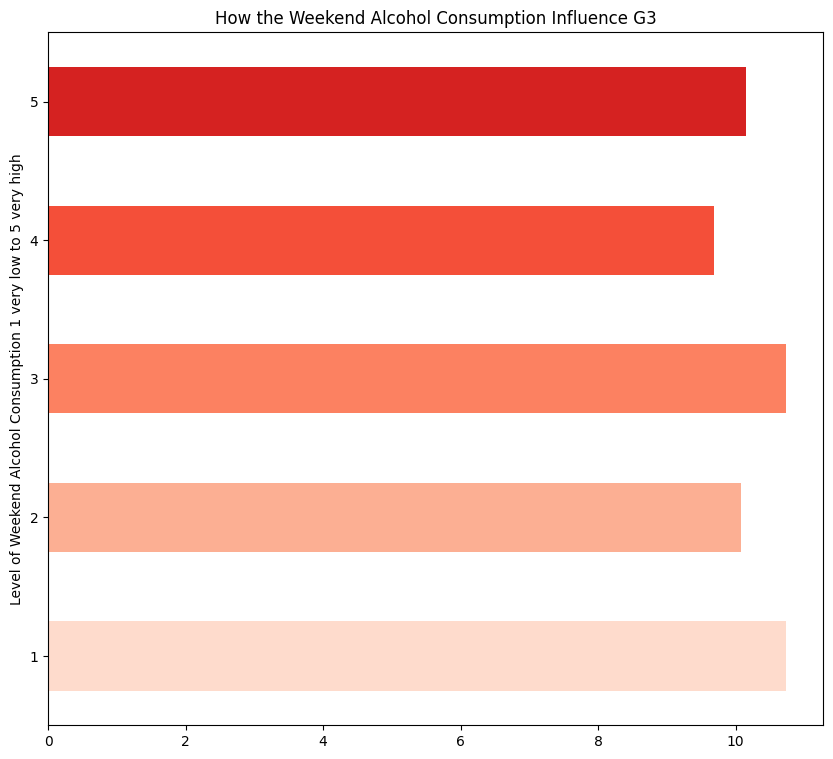

In [23]:
pd.Series({item:dataset[dataset.Walc==item]['G3'].mean() for item in dataset.Walc.unique()}).sort_index().plot(kind='barh', 
            color=sns.color_palette('Reds'), title='How the Weekend Alcohol Consumption Influence G3',
            xlabel='Level of Weekend Alcohol Consumption 1 very low to 5 very high', figsize=(10,9))
plt.show()

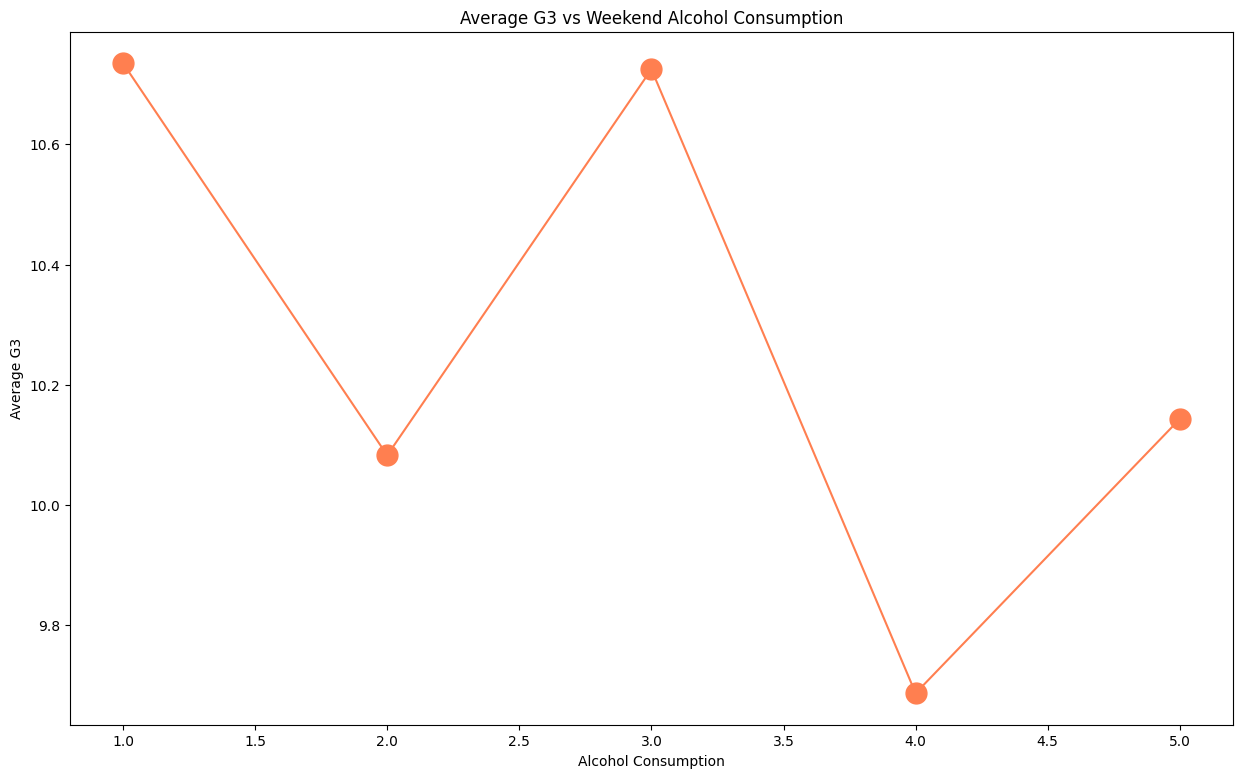

In [24]:
values=dataset.groupby(dataset['Walc'])['G3'].mean().values
index=dataset.groupby(dataset['Walc'])['G3'].mean().index

plt.figure(figsize=(15,9))
plt.plot(index, values, marker='.', markersize=30,linestyle='-', color='coral')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Average G3')
plt.title('Average G3 vs Weekend Alcohol Consumption')
plt.show()

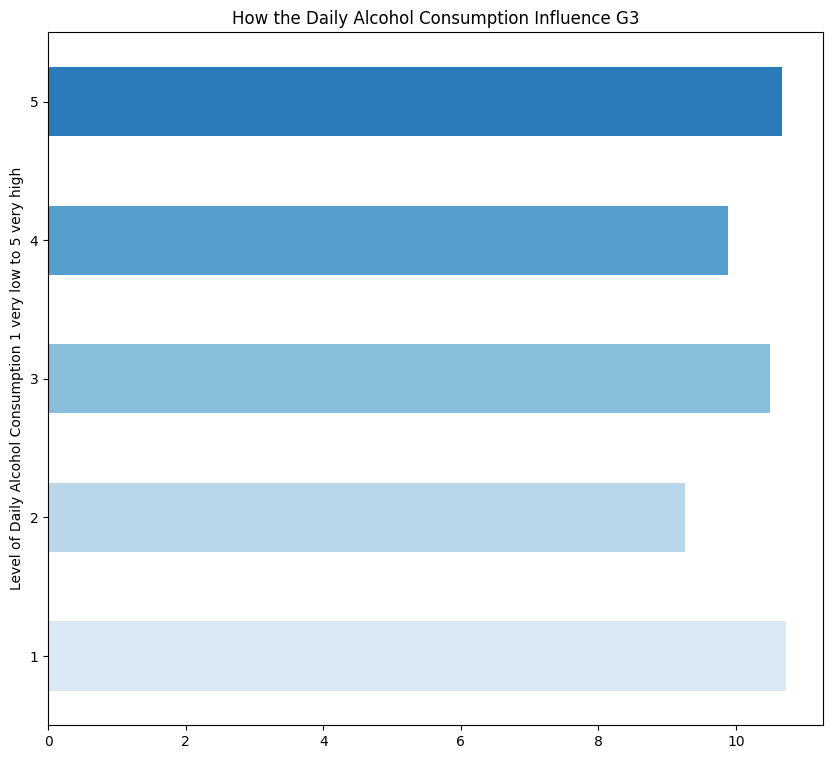

In [25]:
pd.Series({item:dataset[dataset.Dalc==item]['G3'].mean() for item in dataset.Dalc.unique()}).sort_index().plot(kind='barh', 
            color=sns.color_palette('Blues'), title='How the Daily Alcohol Consumption Influence G3',
            xlabel='Level of Daily Alcohol Consumption 1 very low to 5 very high', figsize=(10,9))

plt.show()

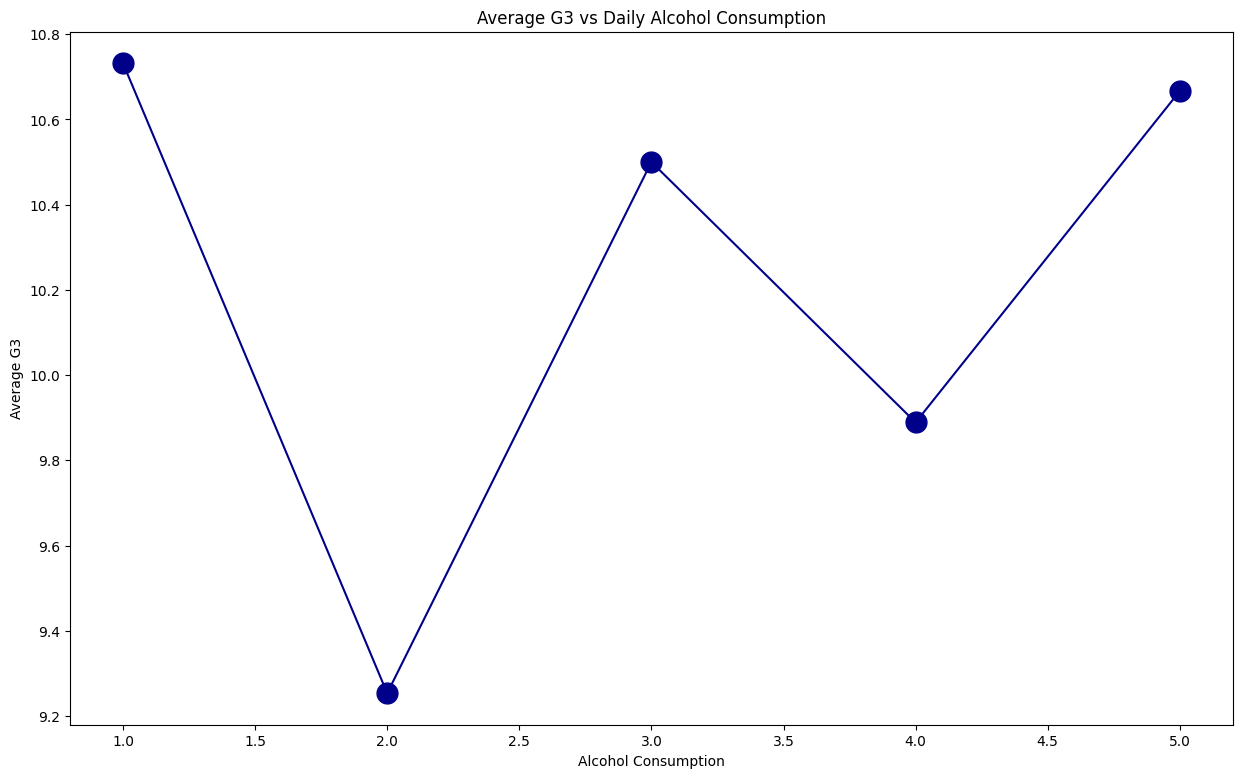

In [26]:
values=dataset.groupby(dataset['Dalc'])['G3'].mean().values
index=dataset.groupby(dataset['Dalc'])['G3'].mean().index

plt.figure(figsize=(15,9))
plt.plot(index, values, marker='.', markersize=30,linestyle='-', color='darkblue')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Average G3')
plt.title('Average G3 vs Daily Alcohol Consumption')
plt.show()

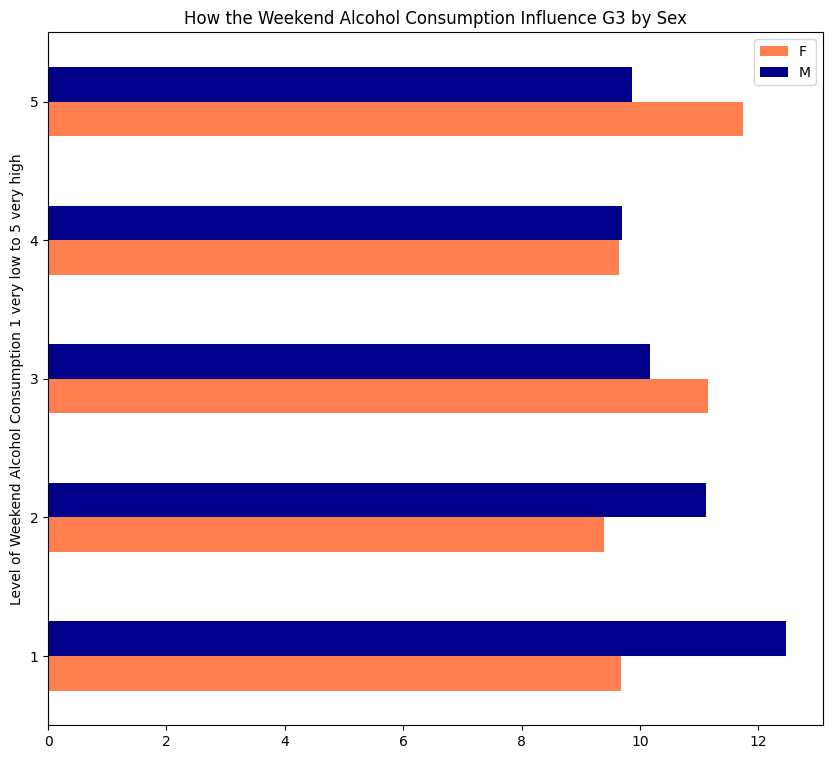

In [27]:
#Walc comparison gender/G3
pd.DataFrame({sex:{i:dataset[(dataset.Walc==i)&(dataset.sex==sex)]['G3'].mean() 
            for i in range(1,6)} 
              for sex in dataset.sex.unique()}).plot(
                    kind='barh', color=['coral', 'darkblue'], title='How the Weekend Alcohol Consumption Influence G3 by Sex',
                    xlabel='Level of Weekend Alcohol Consumption 1 very low to 5 very high', figsize=(10,9) )
plt.show()

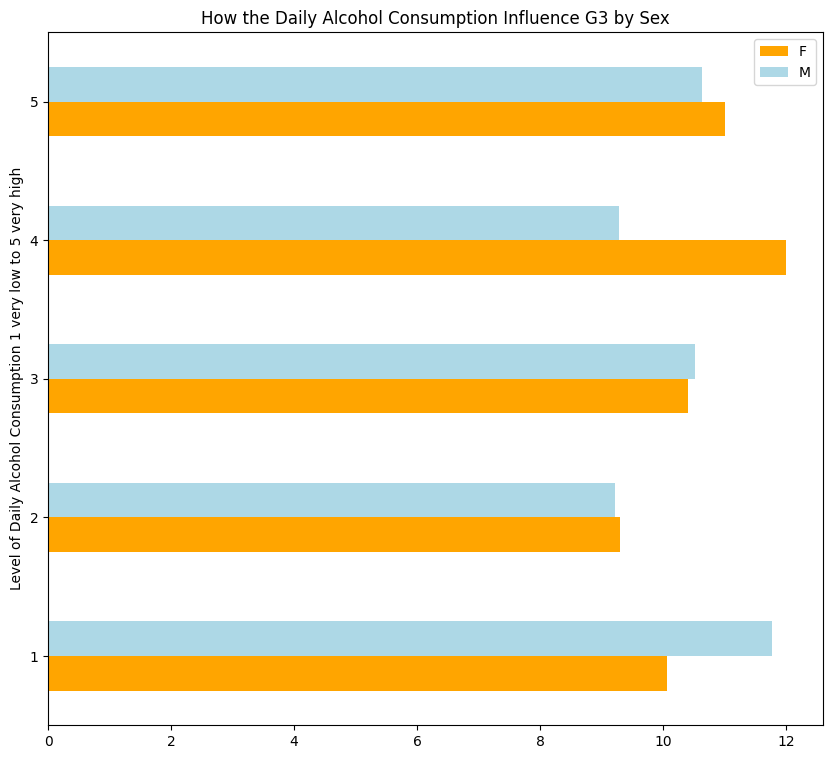

In [28]:
#Dalc comparion gender/G3
pd.DataFrame({sex:{i:dataset[(dataset.Dalc==i)&(dataset.sex==sex)]['G3'].mean() 
            for i in range(1,6)} 
              for sex in dataset.sex.unique()}).plot(
                    kind='barh', color=['orange', 'lightblue'], title='How the Daily Alcohol Consumption Influence G3 by Sex',
                    xlabel='Level of Daily Alcohol Consumption 1 very low to 5 very high', figsize=(10,9) )
plt.show()

In [29]:
import scipy.stats
test1 = scipy.stats.pearsonr(dataset['G3'],dataset['Walc'])
print('Statistic test for correlation  and p-value between G3 and weekend alcohol consumption  is: ', test1)


Statistic test for correlation  and p-value between G3 and weekend alcohol consumption  is:  PearsonRResult(statistic=-0.05193932374224623, pvalue=0.3031521079842851)


In [30]:
test2 = scipy.stats.pearsonr(dataset['G3'],dataset['Dalc'])
print('Statistic test for correlation  and p-value between G3 and daily alcohol consumption  is: ', test2)


Statistic test for correlation  and p-value between G3 and daily alcohol consumption  is:  PearsonRResult(statistic=-0.0546600405667359, pvalue=0.2784914783598843)


In [31]:
dataset.shape
#395 samples, 33 features

(395, 33)

In [32]:
#model
import time
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
X=dataset[['Dalc', 'Walc']]  # Features
y=dataset['G3']  # Labels

clf=RandomForestClassifier(n_estimators=100)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
classifier_names = [
    "Decision Tree",
    "Random Forest", 
    "Neural Net (75, 75)", 
    "Neural Net (784, 784, 784)", 
    "Naive Bayes"
]
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    MLPClassifier(hidden_layer_sizes=(75, 75)),
    MLPClassifier(hidden_layer_sizes=(784, 784, 784)),
    GaussianNB(),
]

for clf, clf_name in zip(classifiers, classifier_names):
    print(f"** {clf_name}")
    t0 = time.time()
    clf.fit(X_train, y_train)
    t1 = time.time()
    print(f"\tTraining time:\t\t{t1-t0:3.3f}")
    score_train = clf.score(X_train, y_train)
    t2 = time.time()
    print(f"\tPrediction time(train):\t{t2-t1:3.3f}")
    score_test = clf.score(X_test, y_test)
    t3 = time.time()
    print(f"\tPrediction time(test):\t{t3-t2:3.3f}")
    print(f"\tScore Train: {score_train:.3f}\tScore Test: {score_test:.3f}")



** Decision Tree
	Training time:		0.002
	Prediction time(train):	0.001
	Prediction time(test):	0.001
	Score Train: 0.196	Score Test: 0.143
** Random Forest
	Training time:		0.132
	Prediction time(train):	0.018
	Prediction time(test):	0.015
	Score Train: 0.196	Score Test: 0.118
** Neural Net (75, 75)
	Training time:		0.467
	Prediction time(train):	0.003
	Prediction time(test):	0.002
	Score Train: 0.170	Score Test: 0.168
** Neural Net (784, 784, 784)
	Training time:		12.928
	Prediction time(train):	0.014
	Prediction time(test):	0.008
	Score Train: 0.185	Score Test: 0.092
** Naive Bayes
	Training time:		0.004
	Prediction time(train):	0.002
	Prediction time(test):	0.002
	Score Train: 0.072	Score Test: 0.067


In [33]:
for a in [0.0001, 0.001, 0.01, 0.1, 1]:
    mlp = MLPClassifier(hidden_layer_sizes=(784, 784, 784), alpha=a)
    t0 = time.time()
    mlp.fit(X_train, y_train)
    t1 = time.time()
    print(mlp.score(X_train, y_train), t1 - t0)

0.18840579710144928 13.799295425415039
0.18478260869565216 13.941661357879639
0.19202898550724637 16.13620400428772
0.18478260869565216 16.9631609916687
0.15217391304347827 12.379141092300415


In [34]:
for hl in [(25), (50), (50, 50), (100), (100, 100)]:
    print(hl, 'hiden layer')
    mlp = MLPClassifier(hidden_layer_sizes=hl)
    t0 = time.time()
    mlp.fit(X_train, y_train)
    t1 = time.time()
    print(mlp.score(X_test, y_test), t1 - t0)
   

25 hiden layer
0.15126050420168066 0.21389222145080566
50 hiden layer
0.15126050420168066 0.23706698417663574
(50, 50) hiden layer
0.16806722689075632 0.3465909957885742
100 hiden layer
0.15126050420168066 0.27748799324035645
(100, 100) hiden layer
0.15966386554621848 0.49116015434265137


In [44]:
#evaluate 
def evaluate(X_train, X_test, y_train, y_test):

    model_name_list = [ "Decision Tree",
                        "Random Forest", 
                        "Neural Net (75, 75)", 
                        "Neural Net (784, 784, 784)", 
                        "Naive Bayes" 
                       ]
     
    model1 = DecisionTreeClassifier()
    model2 = RandomForestClassifier(n_estimators=100)
    model3 = MLPClassifier(hidden_layer_sizes=(75, 75))
    model4 = MLPClassifier(hidden_layer_sizes=(784, 784, 784))
    model5 = GaussianNB()

    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    for i, model in enumerate([model1, model2, model3, model4, model5]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    return results
    
results = evaluate(X_train, X_test, y_train, y_test)
results


mae      rmse
Decision Tree               4.159664  5.716701
Random Forest               3.882353  5.547352
Neural Net (75, 75)         3.142857  4.692207
Neural Net (784, 784, 784)  3.932773  5.420162
Naive Bayes                 5.537815  7.334161

In [46]:
#tune hyper params on MLP 
X = dataset[['Walc','Dalc']] 
y = dataset['G3'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                           random_state=100,
                           test_size=0.3, shuffle=True)

mlpc =MLPClassifier(activation='relu', alpha=0.009,                  
                    hidden_layer_sizes=(784, 784, 784), learning_rate='constant',
                    learning_rate_init=0.0003, max_iter=500,
                    random_state=100, shuffle=True, solver='adam', verbose=False)

mlpc.fit(X_train, y_train)
y_pred = mlpc.predict(X_train)

accuracy_score(y_train, y_pred, normalize = True)

print(f'Acuracy on train set:{format(accuracy_score(y_train, y_pred))}')


Acuracy on train set:0.20652173913043478


In [47]:
mlpc.fit(X_test, y_test)
y_pred = mlpc.predict(X_test)

accuracy_score(y_test, y_pred, normalize = True)

print(f'Acuracy on test set:{format(accuracy_score(y_test, y_pred))}')


Acuracy on test set:0.31932773109243695


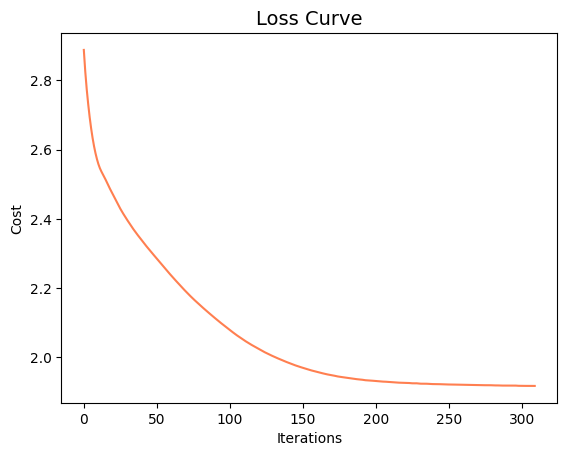

In [48]:
plt.plot(mlpc.loss_curve_, color = 'coral')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [49]:
#let's see how we do with including more features from the dataset

X = dataset[['Walc','Dalc', 'Fedu', 'Medu', 'famrel', 'freetime', 'goout','absences']] 
y = dataset['G3'] 
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                           random_state=100,
                           test_size=0.3, shuffle=True)


mlpc =MLPClassifier(activation='relu', alpha=0.009,                  
                    hidden_layer_sizes=(784, 784, 784), learning_rate='constant',
                    learning_rate_init=0.0003, max_iter=500,
                    random_state=100, shuffle=True, solver='adam', verbose=False)

mlpc.fit(X_train, y_train)
y_pred = mlpc.predict(X_train)

accuracy_score(y_train, y_pred, normalize = True)

print(f'Acuracy on train set:{format(accuracy_score(y_train, y_pred))}')


Acuracy on train set:0.9891304347826086


In [50]:
mlpc.fit(X_test, y_test)
y_pred = mlpc.predict(X_test)

accuracy_score(y_test, y_pred, normalize = True)

print(f'Acuracy on test set:{format(accuracy_score(y_test, y_pred))}')

Acuracy on test set:1.0


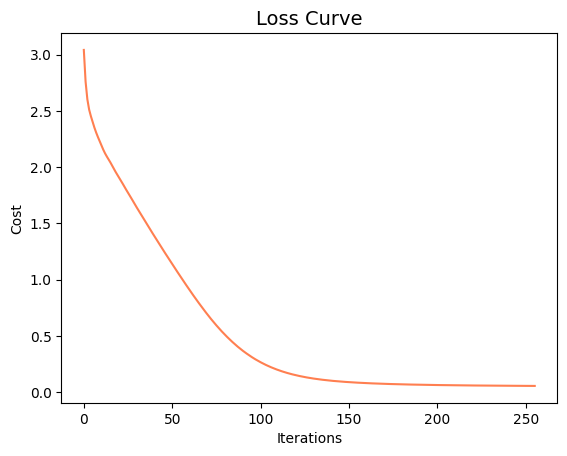

In [51]:
plt.plot(mlpc.loss_curve_, color = 'coral')
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()